In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
cityrides_df = pd.merge(ride_df, city_df,
                                 how='left', on='city')
# Display the data table for preview
cityrides_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

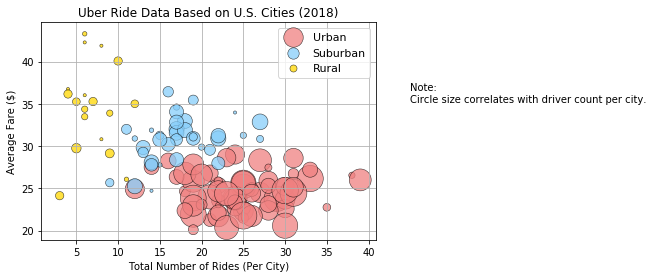

In [2]:
# Obtain the x and y coordinates for each of the three city types
#CityTypes = pd.combined_data_df('city types').unique()
Urban_City = cityrides_df[cityrides_df[('type')]=="Urban"]
Suburban_City = cityrides_df[cityrides_df[('type')]=="Suburban"]
Rural_City = cityrides_df[cityrides_df[('type')]=="Rural"]

Urban_x = Urban_City.groupby(["city"]).count()["ride_id"]
Urban_y = Urban_City.groupby(["city"]).mean()["fare"]
Urban_z = Urban_City.groupby(["city"]).mean()["driver_count"]

Suburban_x = Suburban_City.groupby(["city"]).count()["ride_id"]
Suburban_y = Suburban_City.groupby(["city"]).mean()["fare"]
Suburban_z = Suburban_City.groupby(["city"]).mean()["driver_count"]

Rural_x = Rural_City.groupby(["city"]).count()["ride_id"]
Rural_y = Rural_City.groupby(["city"]).mean()["fare"]
Rural_z = Rural_City.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types:
# Urban City Type
plt.scatter(Urban_x, Urban_y, marker="o", color="lightcoral", label="Urban", edgecolors="black",
            s=Urban_z*10, alpha=0.75, linewidths = 0.55)

# Suburban City Type
plt.scatter(Suburban_x, Suburban_y, marker="o", color="lightskyblue", label="Suburban", edgecolors="black",
            s=Suburban_z*10, alpha=0.75, linewidths = 0.55)

# Rural City Type
plt.scatter(Rural_x, Rural_y, marker="o", color="gold", label="Rural", edgecolors="black",
            s=Rural_z*10, alpha=0.75, linewidths = 0.55)

# Incorporate the other graph properties
plt.title("Uber Ride Data Based on U.S. Cities (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.grid()

# Create a legend
plt.legend(loc="upper right", fontsize=11)

# Incorporate a text label regarding circle size
plt.text(45, 35, s = 'Note: \nCircle size correlates with driver count per city.', horizontalalignment='left', verticalalignment='bottom')

# Save Figure
plt.savefig("pyber_starter_plot.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [4]:
# Total Amount of Fares ($)
Total_fares = cityrides_df['fare'].sum()
Total_fares.round(2)

63538.64

In [5]:
# Calculate Urban City Fares
Urban_driver_count = Urban_City['fare'].sum()/Total_fares
Urban_driver_count.round(3)

0.627

In [6]:
# Calculate Suburban City Fares
Suburban_driver_count = Suburban_City['fare'].sum()/Total_fares
Suburban_driver_count.round(3)

0.305

In [7]:
# Calculate Rural City Fares
Rural_driver_count = Rural_City['fare'].sum()/Total_fares
Rural_driver_count.round(3)

0.068

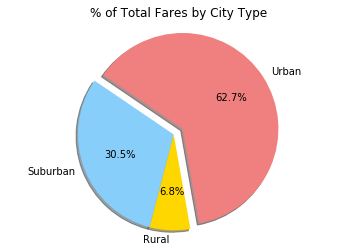

In [8]:
# Create Components of a Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [Urban_driver_count, Suburban_driver_count, Rural_driver_count]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = [0.11, 0, 0]

# Assemble Pie Chart Components
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")

plt.axis("equal")

# Save Figure
plt.savefig("pyber_Total_Fares_Pie.png")

In [9]:
# Show Figure
plt.show()

## Total Rides by City Type

In [10]:
# Calculate Ride Percents
# Calculate the Total Amount of Rides
Total_rides = cityrides_df['ride_id'].count()
Total_rides.round()

2375

In [11]:
# Calculate Urban City Rides
Urban_driver_count = Urban_City['ride_id'].count()/Total_rides
Urban_driver_count.round(3)

0.684

In [12]:
# Calculate Suburban City Rides
Suburban_driver_count = Suburban_City['ride_id'].count()/Total_rides
Suburban_driver_count.round(3)

0.263

In [13]:
# Calculate Rural City Rides
Rural_driver_count = Rural_City['ride_id'].count()/Total_rides
Rural_driver_count.round(3)

0.053

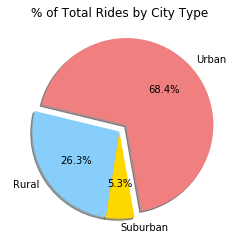

In [14]:
# Create Components of a Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [Urban_driver_count, Suburban_driver_count, Rural_driver_count]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = [0.11, 0, 0]

# Assemble Pie Chart Components
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("pyber_Total_Rides_Pie.png")

In [15]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [16]:
# Calculate Ride Percents
# Calculate the Total Amount of Rides
Total_drivers = cityrides_df.['driver_count'].sum()
Total_drivers

TypeError: 'method' object is not subscriptable

In [56]:
# Calculate Total Drivers in Urban City
Urban_driver_count = Urban_City['driver_count'].sum()*.001
Urban_driver_count.round(2)

59.6

In [57]:
# Calculate Total Drivers in Suburban City
Suburban_driver_count = Suburban_City['driver_count'].sum()*.001
Suburban_driver_count.round(2)

8.57

In [58]:
# Calculate Total Drivers in Rural City
Rural_driver_count = Rural_City['driver_count'].sum()*.001
Rural_driver_count.round(2)

0.54

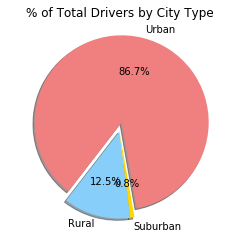

In [59]:
# Create Components of a Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [Urban_driver_count, Suburban_driver_count, Rural_driver_count]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = [0.11, 0, 0]

# Assemble Pie Chart Components
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("pyber_Total_Drivers_Pie.png")

In [ ]:
# Show Figure
plt.show()